<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/05%20Deep%20Learning/notebooks/2-Fully_Connected_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Totalmente Conectadas

**MultiLayer Perceptron (MLP)**

Benchmark actual: [An Ensemble of Simple Convolutional Neural Network Models for MNIST Digit Recognition, 2020](https://github.com/ansh941/MnistSimpleCNN) 99.87% accuracy

## 1. El conjunto de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()  # Hacemos una copia del 'y_test', la usaremos al final

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Visualizamos 6 ejemplos, junto con sus etiquetas

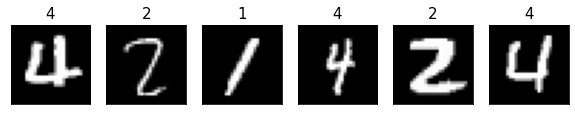

In [2]:
# ------ Obtenemos algunos índices aleatorios:
some_idxs = np.random.choice(list(range(y_train.shape[0])),size=6,replace=False)

fig, axes = plt.subplots(ncols=6, sharex=False,
			 sharey=True, figsize=(10, 4))
for i,idx in enumerate(some_idxs):
	axes[i].set_title(y_train[idx],fontsize=15)
	axes[i].imshow(X_train[idx], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

## Definiendo la red

Como en toda clasificación de clasificación, el vector de etiquetas debe estar codificado como vectores **one-hot**. Es decir:

$$1 → (1,0,...,0) $$
$$2 → (0,1,...,0) $$
$$ ... $$

In [3]:
from tensorflow.keras.utils import to_categorical

print(y_train[:5])

y_train = to_categorical(y_train,num_classes=10)

print(y_train[:5])

y_test = to_categorical(y_test,num_classes=10)

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


En TensorFlow las redes se definen a partir de los tipos de capas y elementos, de manera secuencial y por separado:

* **Dense**: implementa la operación: output = activation(dot(input, kernel) + bias) donde activation es la función de activación por elementos pasada como argumento de activación, kernel es una matriz de pesos creada por la capa, y bias es un vector de sesgo creado por la capa (sólo aplicable si use_bias es True). 
* **Flatten**: Aplana los datos para tener un arreglo unidimensional.
* **Sequential**: Agrupa una secuencia de capas para formar un modelo.

In [4]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

Definimos la arquitectura de la red neuronal. Observa la elección de:
* Activaciones
* Función de perdida
* Optimizador
* Métrica de desempeño 

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


## Visualizamos la arquitectura de la red

A continuación se presentan dos maneras de visualizar la arquitectura de la red.

In [ ]:
!pip install -q visualkeras

     |████████████████████████████████| 992 kB 39.2 MB/s 


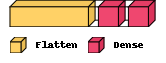

In [ ]:
from visualkeras import layered_view

layered_view(model,legend=True, draw_volume=True,)

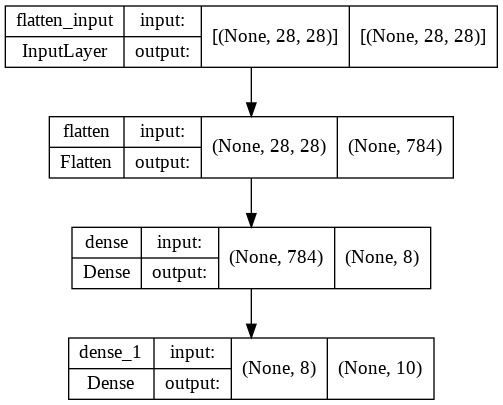

In [6]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

## Entrenando la red

Entrenamos la red con el método `fit`, usamos 8 épocas

Observa que, para realizar el entrenamiento, usamos el conjunto de validación también. Este sirve para proporcionar un indicador no sesgado del desempeño del modelo.

<img align="left" width="50%" src="https://github.com/DCDPUAEM/DCDP_2022/blob/main/05%20Deep%20Learning/img/training-validation-test.png?raw=1"/> 

In [21]:
n_epocas = 12

history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/12
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3223 - acc: 0.6352 - val_loss: 0.8918 - val_acc: 0.7547
Epoch 2/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7868 - acc: 0.7787 - val_loss: 0.7265 - val_acc: 0.7818
Epoch 3/12
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7156 - acc: 0.7856 - val_loss: 0.6640 - val_acc: 0.8007
Epoch 4/12
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6632 - acc: 0.8005 - val_loss: 0.6419 - val_acc: 0.8115
Epoch 5/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6197 - acc: 0.8227 - val_loss: 0.5807 - val_acc: 0.8318
Epoch 6/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5962 - acc: 0.8275 - val_loss: 0.5955 - val_acc: 0.8254
Epoch 7/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5823 - acc: 0.8348 - val_loss: 0.5698 - val_acc: 0.8374
Epoch 8/12
1875/1875 [==============================] - 5s 2ms

### Reanudar entrenamiento

Si queremos reanudar el entrenamiento, por ejemplo, pasar de las 12 épocas anteriores a 15 épocas, podemos usar el parámetro `initial_epoch`. Aunque hay que tener cuidado de guardar la historia previa, si quieremos tener toda la historia de losses de todas las épocas.

In [23]:
n_epocas = 15

history = model.fit(X_train, y_train, epochs=n_epocas, initial_epoch=12, validation_data=(X_test,y_test))

Epoch 13/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5194 - acc: 0.8556 - val_loss: 0.5035 - val_acc: 0.8589
Epoch 14/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5315 - acc: 0.8531 - val_loss: 0.5184 - val_acc: 0.8497
Epoch 15/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5262 - acc: 0.8526 - val_loss: 0.4896 - val_acc: 0.8636


In [25]:
history.history

{'acc': [0.8555833101272583, 0.8531166911125183, 0.8526166677474976],
 'loss': [0.5194177627563477, 0.5314928889274597, 0.5262342691421509],
 'val_acc': [0.8589000105857849, 0.8496999740600586, 0.8636000156402588],
 'val_loss': [0.5034696459770203, 0.5183943510055542, 0.48963916301727295]}

## Curvas de entrenamiento

Graficamos la función de perdida en cada época, tanto en el conjunto de entrenamiento, como en el de validación.

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
plt.show()

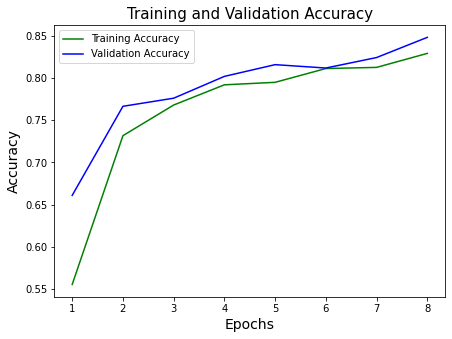

In [ ]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.show()

De la siguiente forma podemos acceder a la matriz de pesos y sesgos en cada capa. Las guardamos como arreglos de numpy. Son los pesos usados en la notebook anterior.

In [ ]:
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]

np.save("mnist_weights1.npy",first_layer_weights)
np.save("mnist_biases1.npy",first_layer_biases)

In [ ]:
second_layer_weights = model.layers[2].get_weights()[0]
second_layer_biases  = model.layers[2].get_weights()[1]

np.save("mnist_weights2.npy",second_layer_weights)
np.save("mnist_biases2.npy",second_layer_biases)

## Predicciones y rendimiento

¿Cómo se ven las predicciones?

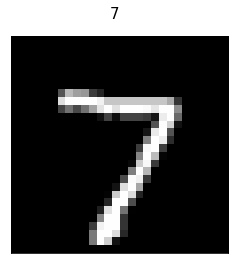

Salida de la red neuronal para este primer elemento:
 [[1.30353665e-05 2.32010629e-04 4.23377845e-03 3.22044687e-03
  2.07137084e-04 2.70031205e-06 9.68990662e-06 9.87025559e-01
  2.18641344e-05 5.03381807e-03]]
Son probabilidades, la suma de las entradas es 1.0
Tomamos el índice de la entrada con mayor probabilidad: [7]


In [9]:
x = X_test[0].copy()

# ----- Graficamos este primer ejemplo de prueba:
plt.figure()
plt.suptitle(y_test_original[0],fontsize=15)
plt.imshow(x, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# ----- Cambiamos a la forma adecuada para entrar a la red neuronal:
x_input = x.reshape(-1,x.shape[0],x.shape[1])

# ----- Lo pasamos por la red neuronal ya entrenada:
prediction = model.predict(x_input)
print(f"Salida de la red neuronal para este primer elemento:\n {prediction}")

print(f"Son probabilidades, la suma de las entradas es {np.sum(prediction)}")

# ----- Tomamos el argmax:
prediction = np.argmax(prediction, axis=1)
print(f"Tomamos el índice de la entrada con mayor probabilidad: {prediction}")

Obtenemos todas las predicciones sobre el conjunto de prueba:

In [10]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

Visualizamos algunas predicciones

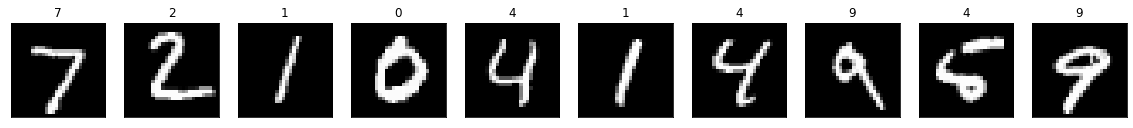

In [12]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Obtenemos las métricas de desempeño de la tarea de clasificación.

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

Test Accuracy: 0.8485
Test Recall: 0.8473122448596004
Test Precision: 0.8517222292407418


Mostramos la matriz de confusión

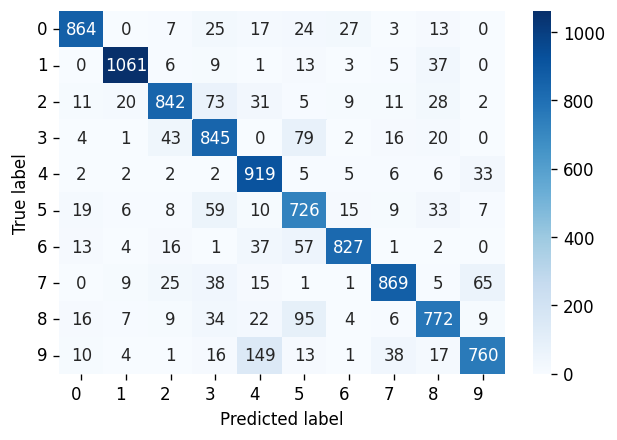

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
  plt.figure(dpi=120)
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  new_xticks =  [str(int(x.get_text())) for x in hmap.xaxis.get_ticklabels()]
  new_yticks =  [str(int(x.get_text())) for x in hmap.yaxis.get_ticklabels()]
  hmap.xaxis.set_ticklabels(new_xticks, rotation=0, ha='right')
  hmap.yaxis.set_ticklabels(new_yticks, rotation=0, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

cm = confusion_matrix(y_test_original,predictions)
show_confusion_matrix(cm)

⭕ ¿Qué dígitos son los que más confunde la red?

## Guardar y leer el modelo para uso futuro

Podemos guardar el modelo completo de la siguiente manera:

In [27]:
model.save('first_model')

INFO:tensorflow:Assets written to: first_model/assets


Podemos leer el modelo completo para seguirlo usando:

In [28]:
from tensorflow.keras.models import load_model

model_2 = load_model('/content/first_model')

A partir de aquí, podemos usar de manera usual el modelo. Por ejemplo, podemos predecir:

In [29]:
model_2.predict(X_test)

array([[3.2295397e-04, 1.0308702e-03, 5.2473047e-03, ..., 9.7680271e-01,
        8.9059329e-05, 1.2334202e-02],
       [5.8474188e-04, 1.8395648e-04, 9.8385781e-01, ..., 2.4783105e-04,
        2.0445313e-03, 6.8123062e-04],
       [1.4132679e-04, 9.7155374e-01, 2.0456915e-03, ..., 2.8339396e-03,
        1.6427681e-02, 7.4828567e-04],
       ...,
       [1.0248527e-03, 1.5537951e-05, 2.3789008e-04, ..., 4.3315282e-03,
        1.0292461e-03, 6.2982358e-02],
       [1.6098568e-01, 1.1182526e-04, 1.2625511e-03, ..., 1.8820165e-04,
        1.8831959e-02, 3.5613350e-04],
       [7.8059616e-03, 1.8337074e-04, 1.1367598e-02, ..., 5.5691373e-05,
        6.1210437e-04, 2.0544462e-04]], dtype=float32)

---

##⭕ Ejercicio

Cambiando el número neuronas en la capa oculta o el número de épocas, ¿puedes subir las métricas de desempeño?

Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/

A continuación, se presenta un ejemplo de alrededor de 97% de accuracy.

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(700, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='sgd',
	      metrics=['acc']
          )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 700)               549500    
                                                                 
 dense_8 (Dense)             (None, 500)               350500    
                                                                 
 dense_9 (Dense)             (None, 10)                5010      
                                                                 
Total params: 905,010
Trainable params: 905,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epocas = 20

history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

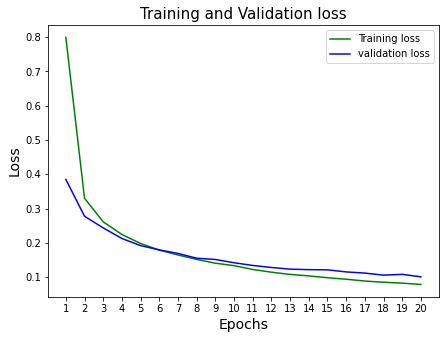

In [37]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

Test Accuracy: 0.9706
Test Recall: 0.97031706471062
Test Precision: 0.9703745961595673
